# **Práctica 7: Fusion de datos**

Nombre:

No. Cuenta:

Email:

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer una fusión de datos a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance
#!pip install googlefinance

In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [3]:
# Para Amazon
DataAmazon = yf.Ticker('AMZN')

In [4]:
AmazonHist = DataAmazon.history(start = '2019-1-1', end = '2023-03-28', interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,159662000,0.0,0.0
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,139512000,0.0,0.0
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,183652000,0.0,0.0
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,159864000,0.0,0.0
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,177628000,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,98.139999,100.849998,98.000000,100.610001,58597300,0.0,0.0
2023-03-22 00:00:00-04:00,100.449997,102.099998,98.610001,98.699997,57475400,0.0,0.0
2023-03-23 00:00:00-04:00,100.430000,101.059998,97.620003,98.709999,57559300,0.0,0.0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [5]:
AmazonHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1066 entries, 2019-01-02 00:00:00-05:00 to 2023-03-27 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1066 non-null   float64
 1   High          1066 non-null   float64
 2   Low           1066 non-null   float64
 3   Close         1066 non-null   float64
 4   Volume        1066 non-null   int64  
 5   Dividends     1066 non-null   float64
 6   Stock Splits  1066 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 66.6 KB


In [6]:
AmazonHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1066.000000,1066.000000,1066.000000,1066.000000,1.066000e+03,1066.0,1066.000000
mean,127.468310,129.037697,125.770199,127.417888,7.941315e+07,0.0,0.018762
std,33.447152,33.764443,33.027001,33.341037,3.418209e+07,0.0,0.612564
min,73.260002,76.900002,73.046501,75.014000,1.762600e+07,0.0,0.000000
25%,93.760000,94.900126,92.807503,93.794252,5.643850e+07,0.0,0.000000
50%,122.400501,123.803249,120.626247,122.343498,6.974275e+07,0.0,0.000000
75%,160.419621,162.231869,158.595005,160.309750,9.309050e+07,0.0,0.000000
max,187.199997,188.654007,184.839493,186.570496,3.113460e+08,0.0,20.000000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los valores a fusionar**

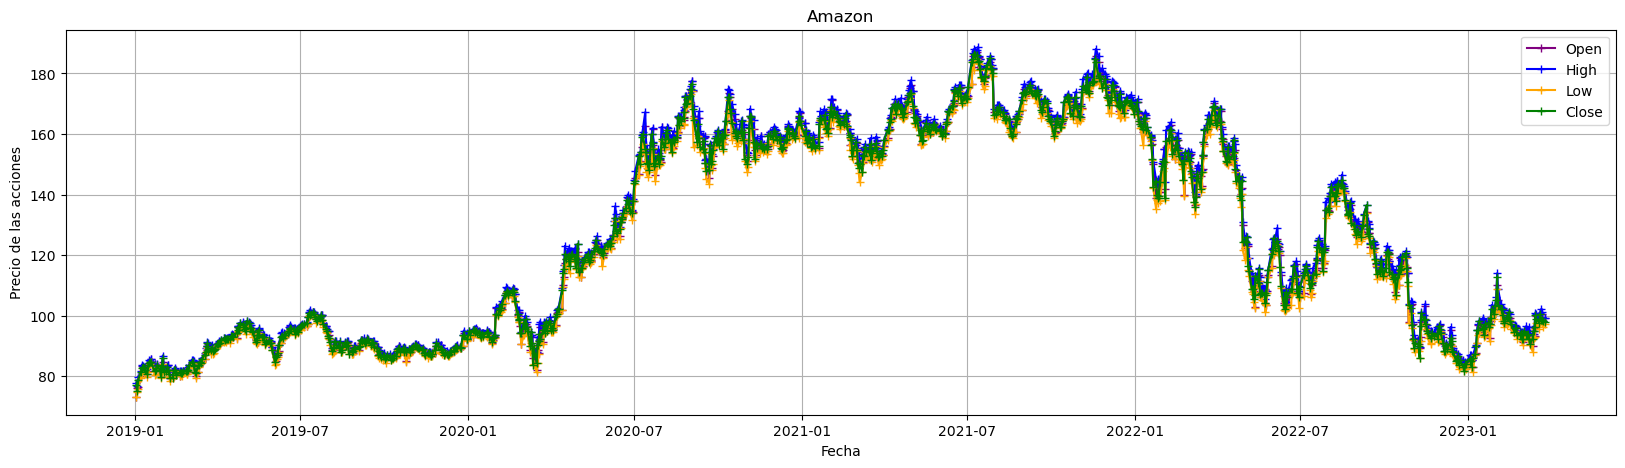

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='purple', marker='+', label='Open')
plt.plot(AmazonHist['High'], color='blue', marker='+', label='High')
plt.plot(AmazonHist['Low'], color='orange', marker='+', label='Low')
plt.plot(AmazonHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

### Fusion de datos de modo tradicional

In [8]:
Fusion = AmazonHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
Fusion

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002
...,...,...,...,...
2023-03-21 00:00:00-04:00,98.139999,100.849998,98.000000,100.610001
2023-03-22 00:00:00-04:00,100.449997,102.099998,98.610001,98.699997
2023-03-23 00:00:00-04:00,100.430000,101.059998,97.620003,98.709999


In [9]:
# En caso de tener valores nulos
Fusion = Fusion.dropna()
Fusion

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002
...,...,...,...,...
2023-03-21 00:00:00-04:00,98.139999,100.849998,98.000000,100.610001
2023-03-22 00:00:00-04:00,100.449997,102.099998,98.610001,98.699997
2023-03-23 00:00:00-04:00,100.430000,101.059998,97.620003,98.709999


In [10]:
#Promedio
PromedioSimple = Fusion.loc[: , 'Open':'Close']
Fusion['Media'] = PromedioSimple.mean(axis='columns')
Fusion

,Open,High,Low,Close,Media
Date,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,75.232750
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,75.692501
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,77.721249
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,80.694626
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,82.681124
...,...,...,...,...,...
2023-03-21 00:00:00-04:00,98.139999,100.849998,98.000000,100.610001,99.400000
2023-03-22 00:00:00-04:00,100.449997,102.099998,98.610001,98.699997,99.964998
2023-03-23 00:00:00-04:00,100.430000,101.059998,97.620003,98.709999,99.455000


In [11]:
#Mediana
Mediana = Fusion.loc[: , 'Open':'Close']
Fusion['Mediana'] = Mediana.median(axis='columns')
Fusion

,Open,High,Low,Close,Media,Mediana
Date,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,75.232750,75.108250
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,75.692501,75.507252
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,77.721249,77.634750
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,80.694626,80.795502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,82.681124,83.031750
...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,98.139999,100.849998,98.000000,100.610001,99.400000,99.375000
2023-03-22 00:00:00-04:00,100.449997,102.099998,98.610001,98.699997,99.964998,99.574997
2023-03-23 00:00:00-04:00,100.430000,101.059998,97.620003,98.709999,99.455000,99.570000


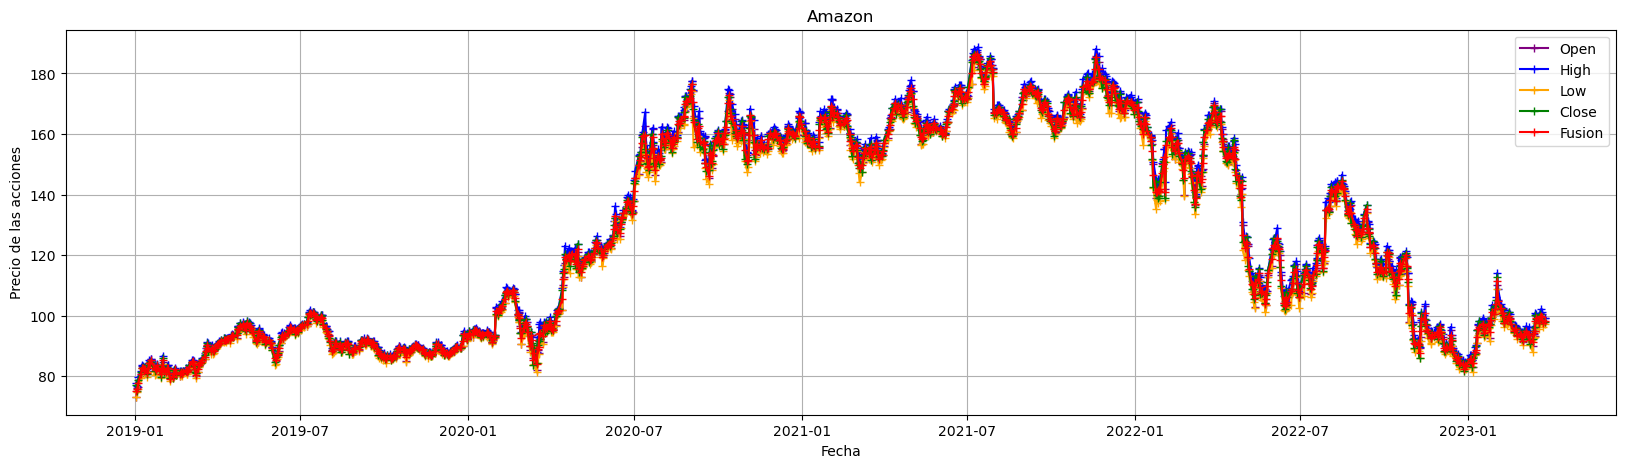

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(Fusion['Open'], color='purple', marker='+', label='Open')
plt.plot(Fusion['High'], color='blue', marker='+', label='High')
plt.plot(Fusion['Low'], color='orange', marker='+', label='Low')
plt.plot(Fusion['Close'], color='green', marker='+', label='Close')
plt.plot(Fusion['Media'], color='red', marker='+', label='Fusion')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

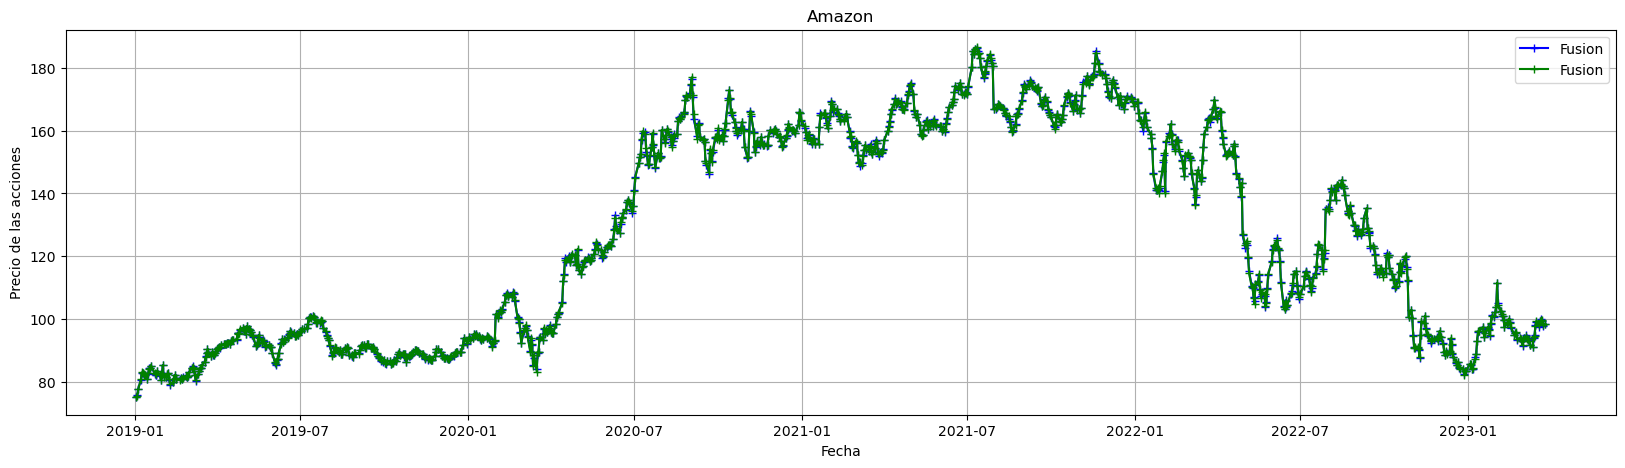

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(Fusion['Media'], color='blue', marker='+', label='Fusion')
plt.plot(Fusion['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

### Fusion de datos mediante algoritmos de ML

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, max_error, r2_score 

In [15]:
X_train = np.array(Fusion[['Open', 'High', 'Low']])
pd.DataFrame(X_train)

,0,1,2
0,73.260002,77.667999,73.046501
1,76.000504,76.900002,74.855499
2,76.500000,79.699997,75.915497
3,80.115501,81.727997,79.459503
4,83.234497,83.830498,80.830498
...,...,...,...
1061,98.139999,100.849998,98.000000
1062,100.449997,102.099998,98.610001
1063,100.430000,101.059998,97.620003
1064,98.070000,98.300003,96.400002


In [16]:
Y_train = np.array(Fusion[['Close']])
pd.DataFrame(Y_train)

,0
0,76.956497
1,75.014000
2,78.769501
3,81.475502
4,82.829002
...,...
1061,100.610001
1062,98.699997
1063,98.709999
1064,98.129997


In [17]:
FusionLineal = linear_model.LinearRegression()
FusionLineal.fit(X_train, Y_train) 

LinearRegression()

In [18]:
#Se genera la estimación
Y_estimacion = FusionLineal.predict(X_train)
pd.DataFrame(Y_estimacion)

,0
0,76.875803
1,75.916975
2,78.797866
3,81.017613
4,81.870282
...,...
1061,100.349619
1062,100.396765
1063,98.739344
1064,96.965863


In [19]:
Fusion['FusionLineal'] = Y_estimacion
Fusion

,Open,High,Low,Close,Media,Mediana,FusionLineal
Date,,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,75.232750,75.108250,76.875803
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,75.692501,75.507252,75.916975
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,77.721249,77.634750,78.797866
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,80.694626,80.795502,81.017613
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,82.681124,83.031750,81.870282
...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,98.139999,100.849998,98.000000,100.610001,99.400000,99.375000,100.349619
2023-03-22 00:00:00-04:00,100.449997,102.099998,98.610001,98.699997,99.964998,99.574997,100.396765
2023-03-23 00:00:00-04:00,100.430000,101.059998,97.620003,98.709999,99.455000,99.570000,98.739344


In [20]:
print('Coeficientes: \n', FusionLineal.coef_)
print('Intercepto: \n', FusionLineal.intercept_)
print("MSE: %.4f" % mean_squared_error(Y_train, Y_estimacion))
print("RMSE: %.4f" % mean_squared_error(Y_train, Y_estimacion, squared=False))  #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y_train, Y_estimacion))

Coeficientes: 
 [[-0.64645806  0.83923804  0.80559745]]
Intercepto: 
 [0.20730705]
MSE: 0.9809
RMSE: 0.9904
Score (Bondad de ajuste): 0.9991


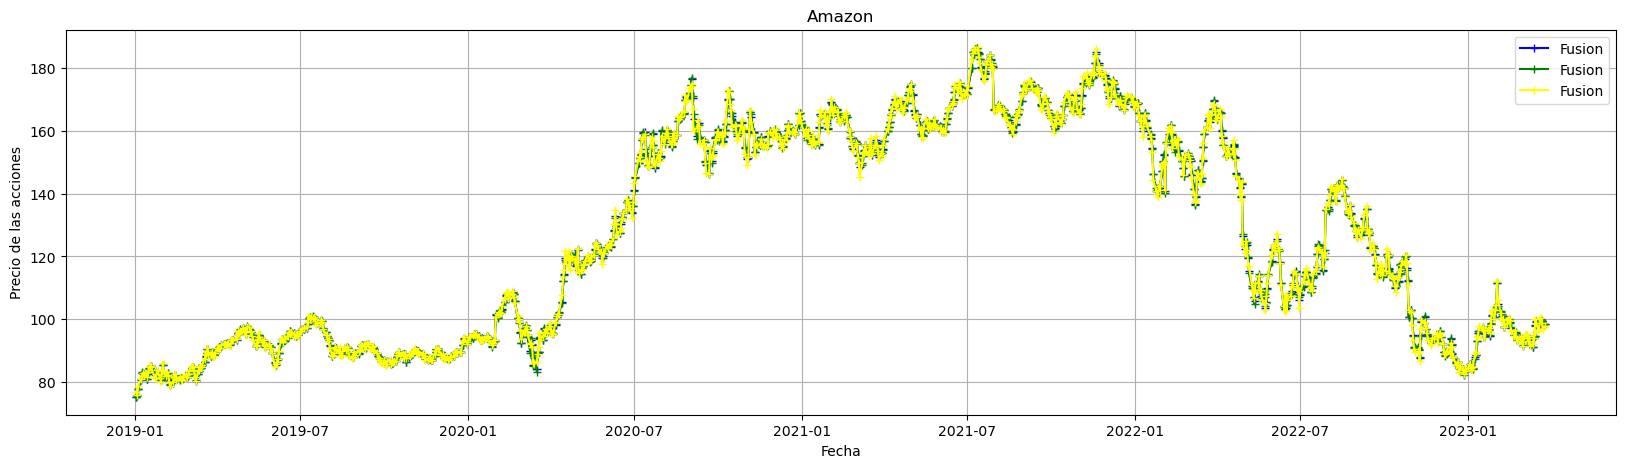

In [21]:
plt.figure(figsize=(20, 5))
plt.plot(Fusion['Media'], color='blue', marker='+', label='Fusion')
plt.plot(Fusion['Mediana'], color='green', marker='+', label='Fusion')
plt.plot(Fusion['FusionLineal'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()